# Exploratory Data Analysis

In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
plt.rcParams['figure.dpi'] = 300 # Resolution dots per inches
%matplotlib inline
# after plotting graph, many times depending on version of working library like matplotlib graph will not be displayed in output screen below
# For that we have to write everytime plt.show(). So if you write '%matplotlib inline' we don't need to write show() method.
import warnings # any library will give you future warnings regarding updates in functions. To ignore it write this line
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/data_clean1.csv") # No index column will be displayed
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [ ]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


In [ ]:
df.tail(10)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
148,30.0,193.0,6.9,9,26,2010,70,C
149,NaN,145.0,13.2,9,27,2010,77,PS
150,14.0,191.0,14.3,9,28,2010,75,S
151,18.0,131.0,8.0,9,29,2010,76,PS
152,20.0,223.0,11.5,9,30,2010,68,S
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S
157,18.0,131.0,8.0,9,29,2010,76,C


In [ ]:
df.describe(include=object)
# There are 8 columns but in above code we got descriptive statistics for only numeric colums
# But if you check month and weater column, month is also numeric. But may be because of a single text value data type of entire column has become object.
# in weather 3 missing values are there
# top: the value having high frequency in that column, S is used 59 times in Weather col., 9 is used 34 times in Month col.

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


# Data type conversion

In [ ]:
df['Month']

0      5
1      5
2      5
3      5
4      5
      ..
153    5
154    9
155    9
156    9
157    9
Name: Month, Length: 158, dtype: object

In [ ]:
df['Month'].unique()
# May is present so data type is object. We can replace it with 5 as 5th month is May. If can't guess replace is with NaN

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [ ]:
df['Month'].value_counts()

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64

In [ ]:
df['Month'].replace('May','5',inplace=True) # replacing only value not the datatype

In [ ]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [ ]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [ ]:
df['Month'].astype(int) # no permanent changes, inplace=True is not allowed here

0      5
1      5
2      5
3      5
4      5
      ..
153    5
154    9
155    9
156    9
157    9
Name: Month, Length: 158, dtype: int64

In [ ]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [ ]:
df['Month'] = df['Month'].astype(int)

In [ ]:
df.dtypes # now Month's datatype is changed

Ozone      float64
Solar.R    float64
Wind       float64
Month        int64
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# **Duplicates**

In [ ]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [ ]:
df.duplicated()
# If duplicate values are there your model will not learn any new thing from it.

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [ ]:
df.duplicated().sum() # index 157 is duplicate record of other record

1

In [ ]:
# print duplicated values. keep=(first,last,false),keep=first 1st record as original and rest as duplicate
# default for keep is first. keep=false will treat all similar records as duplicate
df[df.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9,28,2010,75,S


In [ ]:
df[df.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9,28,2010,75,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [ ]:
# Drop Duplicated records

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(157, 8)

In [ ]:
df.duplicated().sum()

0

# **Drop Columns**

In [ ]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


In [ ]:
df.tail(10)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
147,14.0,20.0,16.6,9,25,2010,63,PS
148,30.0,193.0,6.9,9,26,2010,70,C
149,NaN,145.0,13.2,9,27,2010,77,PS
150,14.0,191.0,14.3,9,28,2010,75,S
151,18.0,131.0,8.0,9,29,2010,76,PS
152,20.0,223.0,11.5,9,30,2010,68,S
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
157,18.0,131.0,8.0,9,29,2010,76,C


In [ ]:
df.drop(columns=['Year'],inplace=True)

KeyError: "['Year'] not found in axis"

In [ ]:
df.shape

(157, 7)

In [ ]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [ ]:
# To drop multiple columns: will drop only for display purpose
df.drop(columns=['Ozone','Month'])# as inplace=True not written, changes are temporary

,Solar.R,Wind,Day,Temp,Weather
0,190.0,7.4,1,67,S
1,118.0,8.0,2,72,C
2,149.0,12.6,3,74,PS
3,313.0,11.5,4,62,S
4,NaN,14.3,5,56,S
...,...,...,...,...,...
152,223.0,11.5,30,68,S
153,190.0,7.4,1,67,C
154,193.0,6.9,26,70,PS
155,145.0,13.2,27,77,S


In [ ]:
df # Ozone and Month colums are present in dataframe

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [ ]:
# to drop a record or row
df.drop(index=[1]) # Temporary changes

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
5,28.0,NaN,14.9,5,6,66,C
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [ ]:
# drop multiple rows
df.drop(index=[1,3])

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
2,12.0,149.0,12.6,5,3,74,PS
4,NaN,NaN,14.3,5,5,56,S
5,28.0,NaN,14.9,5,6,66,C
6,23.0,299.0,8.6,5,7,65,PS
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# **Rename the Column**

In [ ]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [ ]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [ ]:
#rename the Solar column, Pass parameter in dictionary form
df.rename(columns={'Solar.R': 'Solar','Temp':'Temperature'}, inplace=True)

In [ ]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# **Missing Value Imputation**
Reasons of missing values:
*   Data entry errors
*   Issues with machines
*   Improper data handling, etc.
## **Treatment**
*   0 to 5 % missing values: drop rows
*   6 to 45 %: replace the missing values
* >50%: drop column





In [ ]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


In [ ]:
df.isna() # or isnull(), True: missing value

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [ ]:
df.isnull().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

<Axes: >

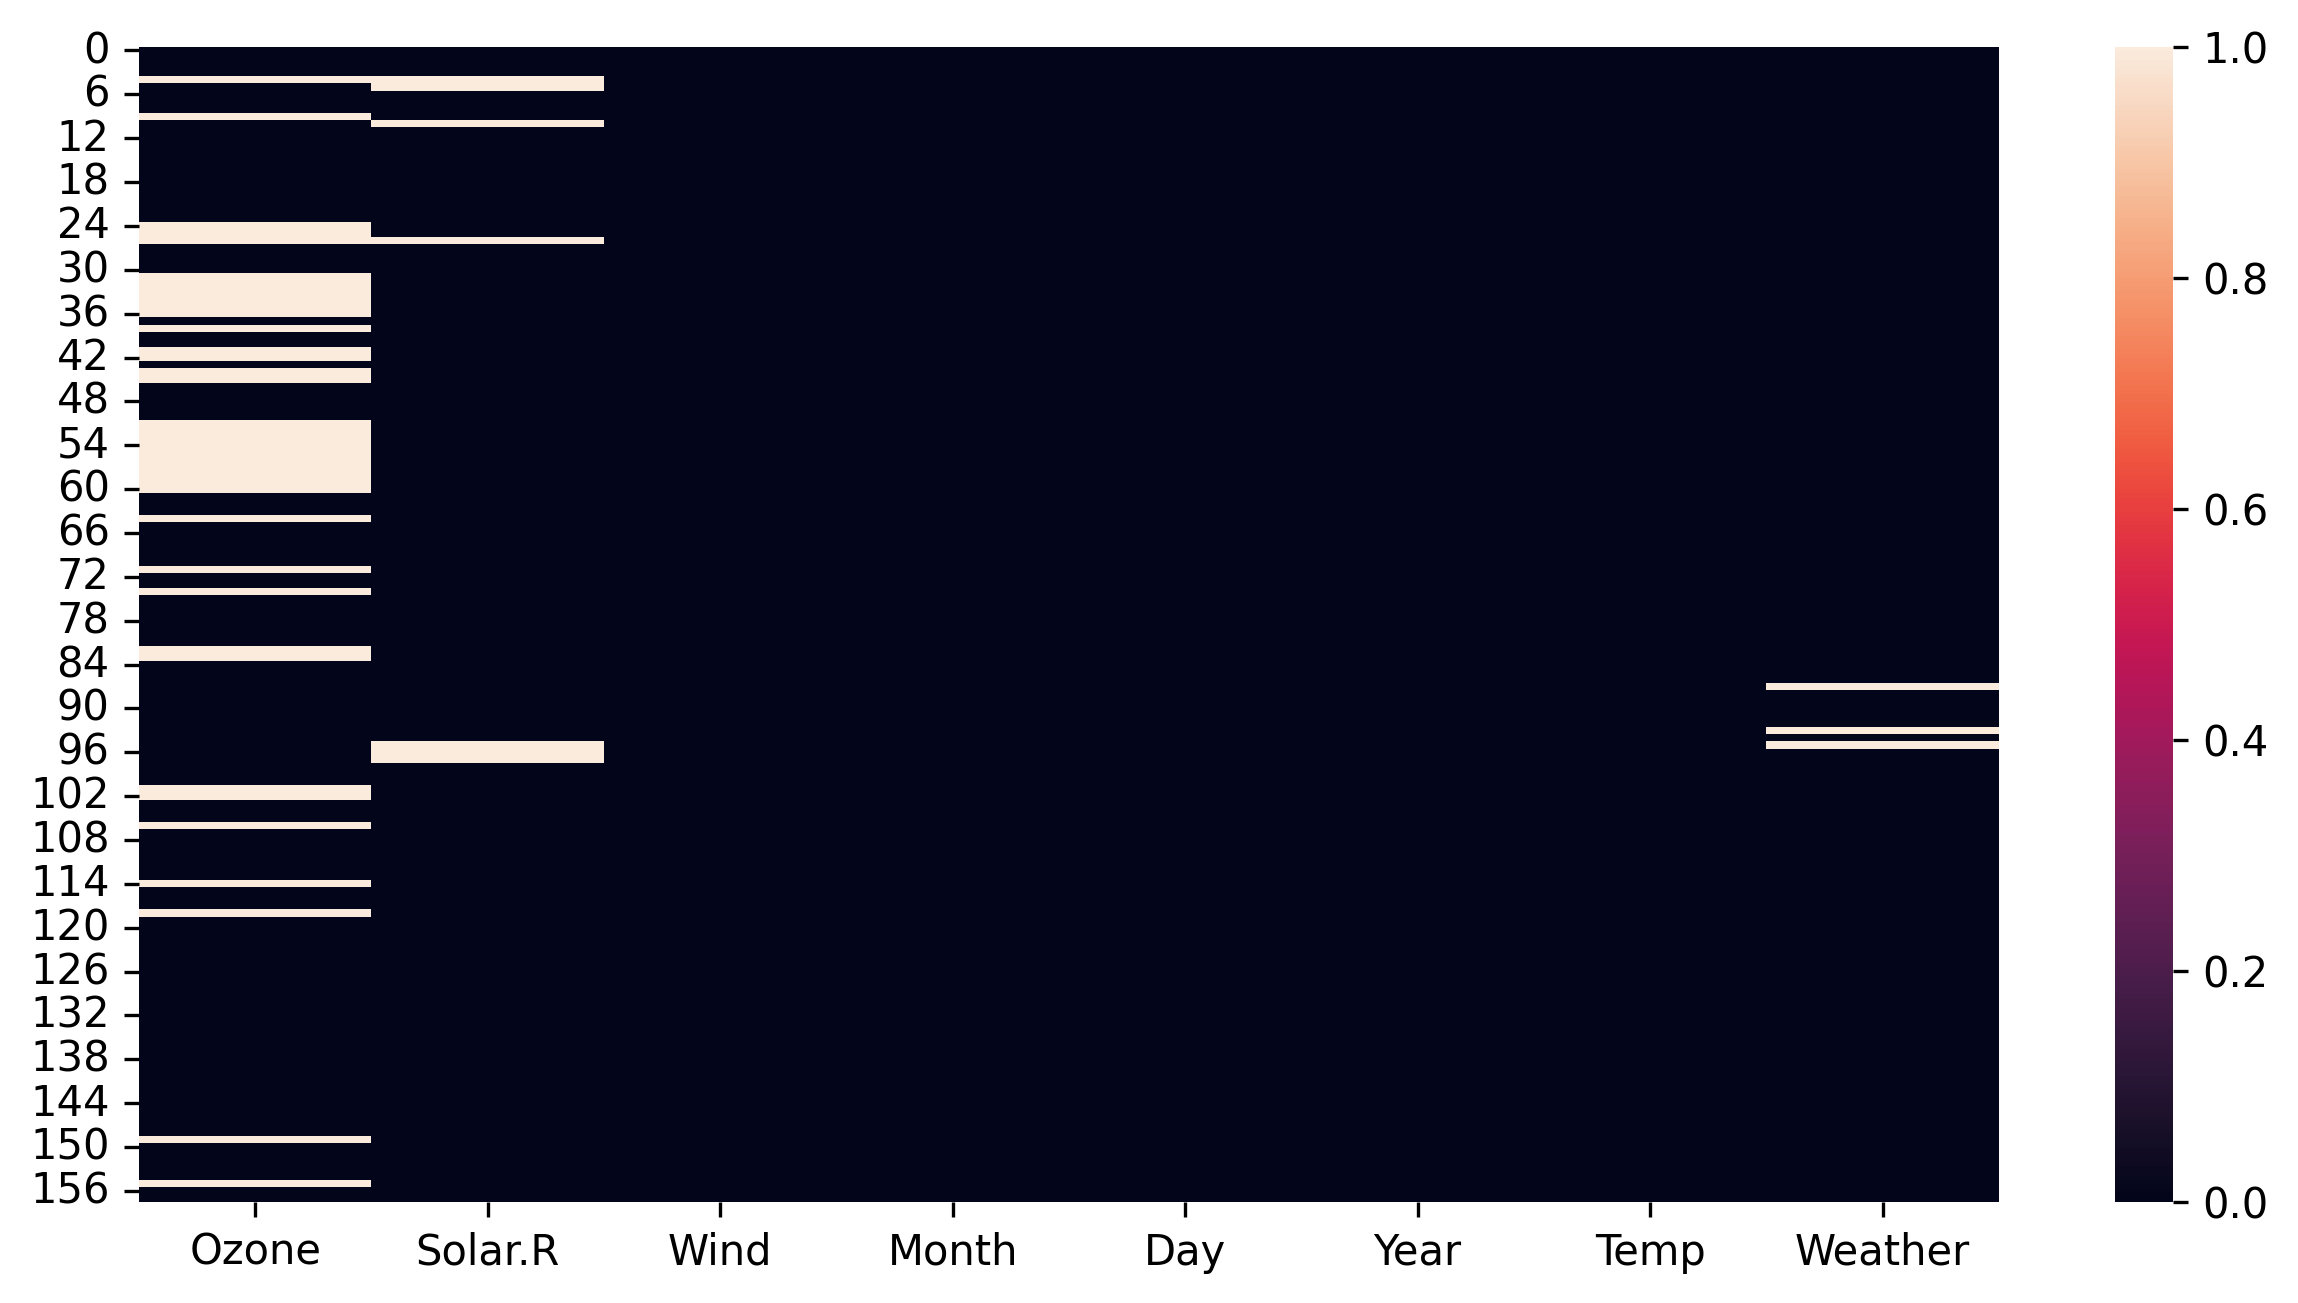

In [ ]:
# visualize missing values
sns.heatmap(df.isna()) # white horizontal lines are missing values

In [ ]:
df.isna().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [ ]:
len(df)

158

In [ ]:
# % of missing values
for i in df.isna().sum():
  print((i/len(df))*100)
# Ozone: replace missing values as missing values are in the range of 6 to 45%
# Solar, Weather: drop missing values
# but we will treat missing values
# Ozone and Solar are numeric columns. If outliers are present in that column, replace missing values with median,
# if no outliers in column replace missing value with mean
# if categorical column replace missing value with mode.

# 0 to 5 % missing values: drop rows
# 6 to 45 %: replace the missing values
# 50%: drop column

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


In [ ]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


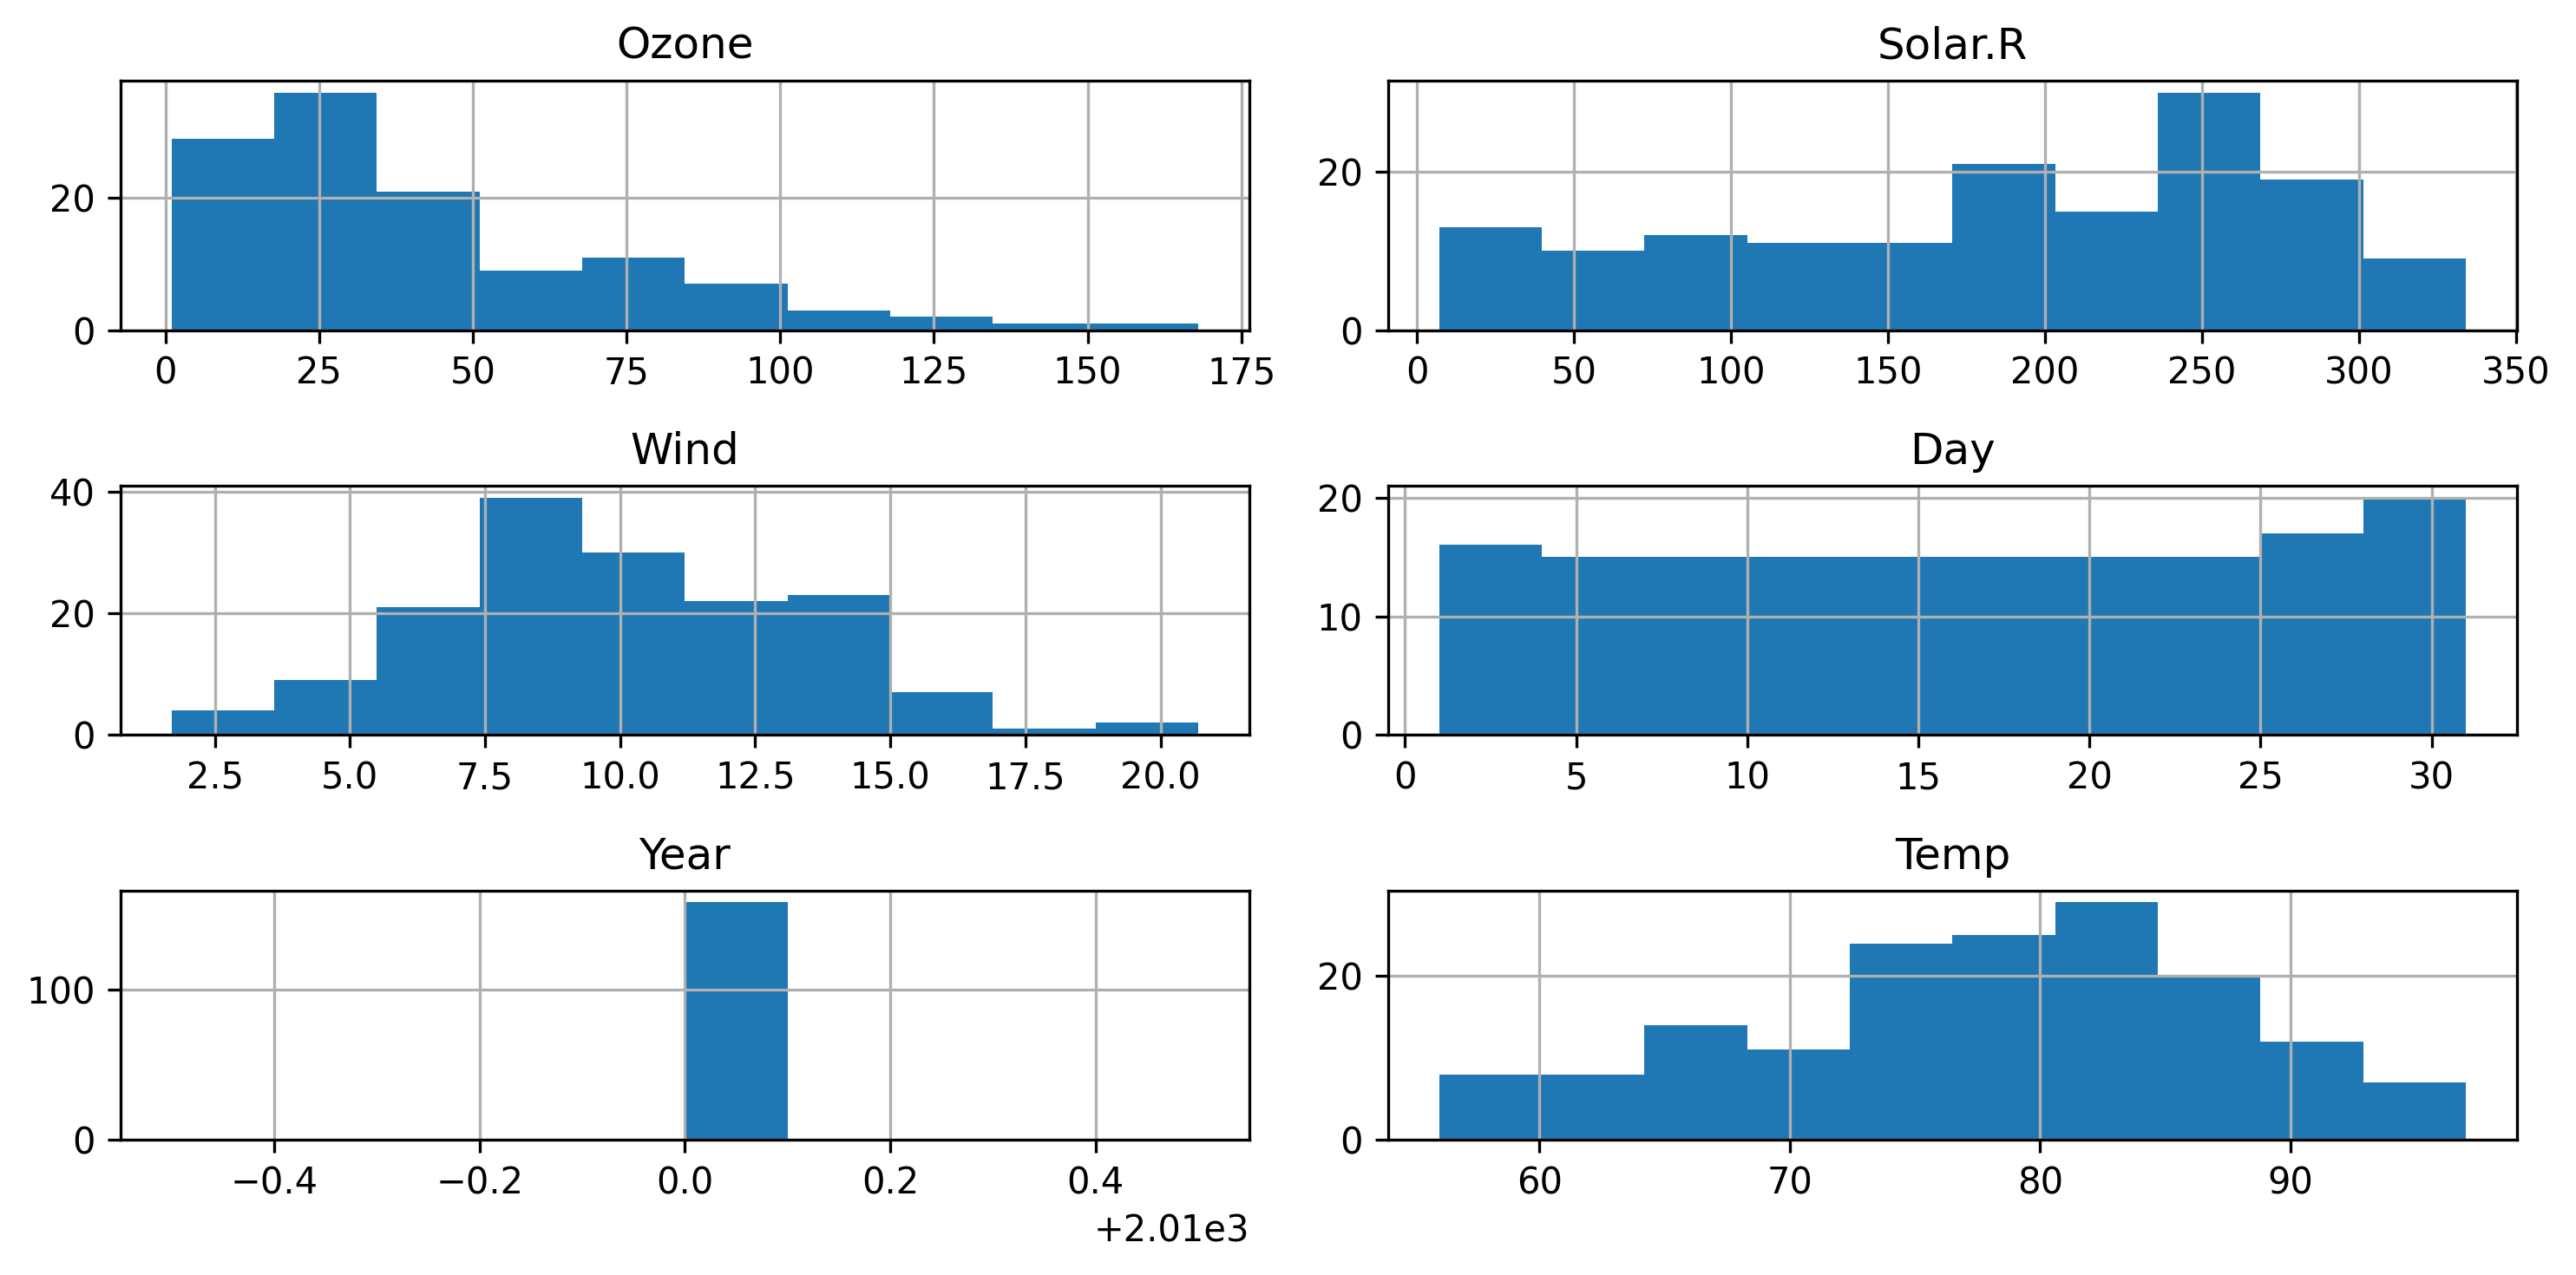

In [ ]:
df.hist()
plt.tight_layout() # avoid overlapping of labels of graphs
# Skewness: Less than -1 or greater than +1 high skewness, Ozone
# -0.5 to +0.5: Moderate skewness, Solar
# 0: Normal

<Axes: >

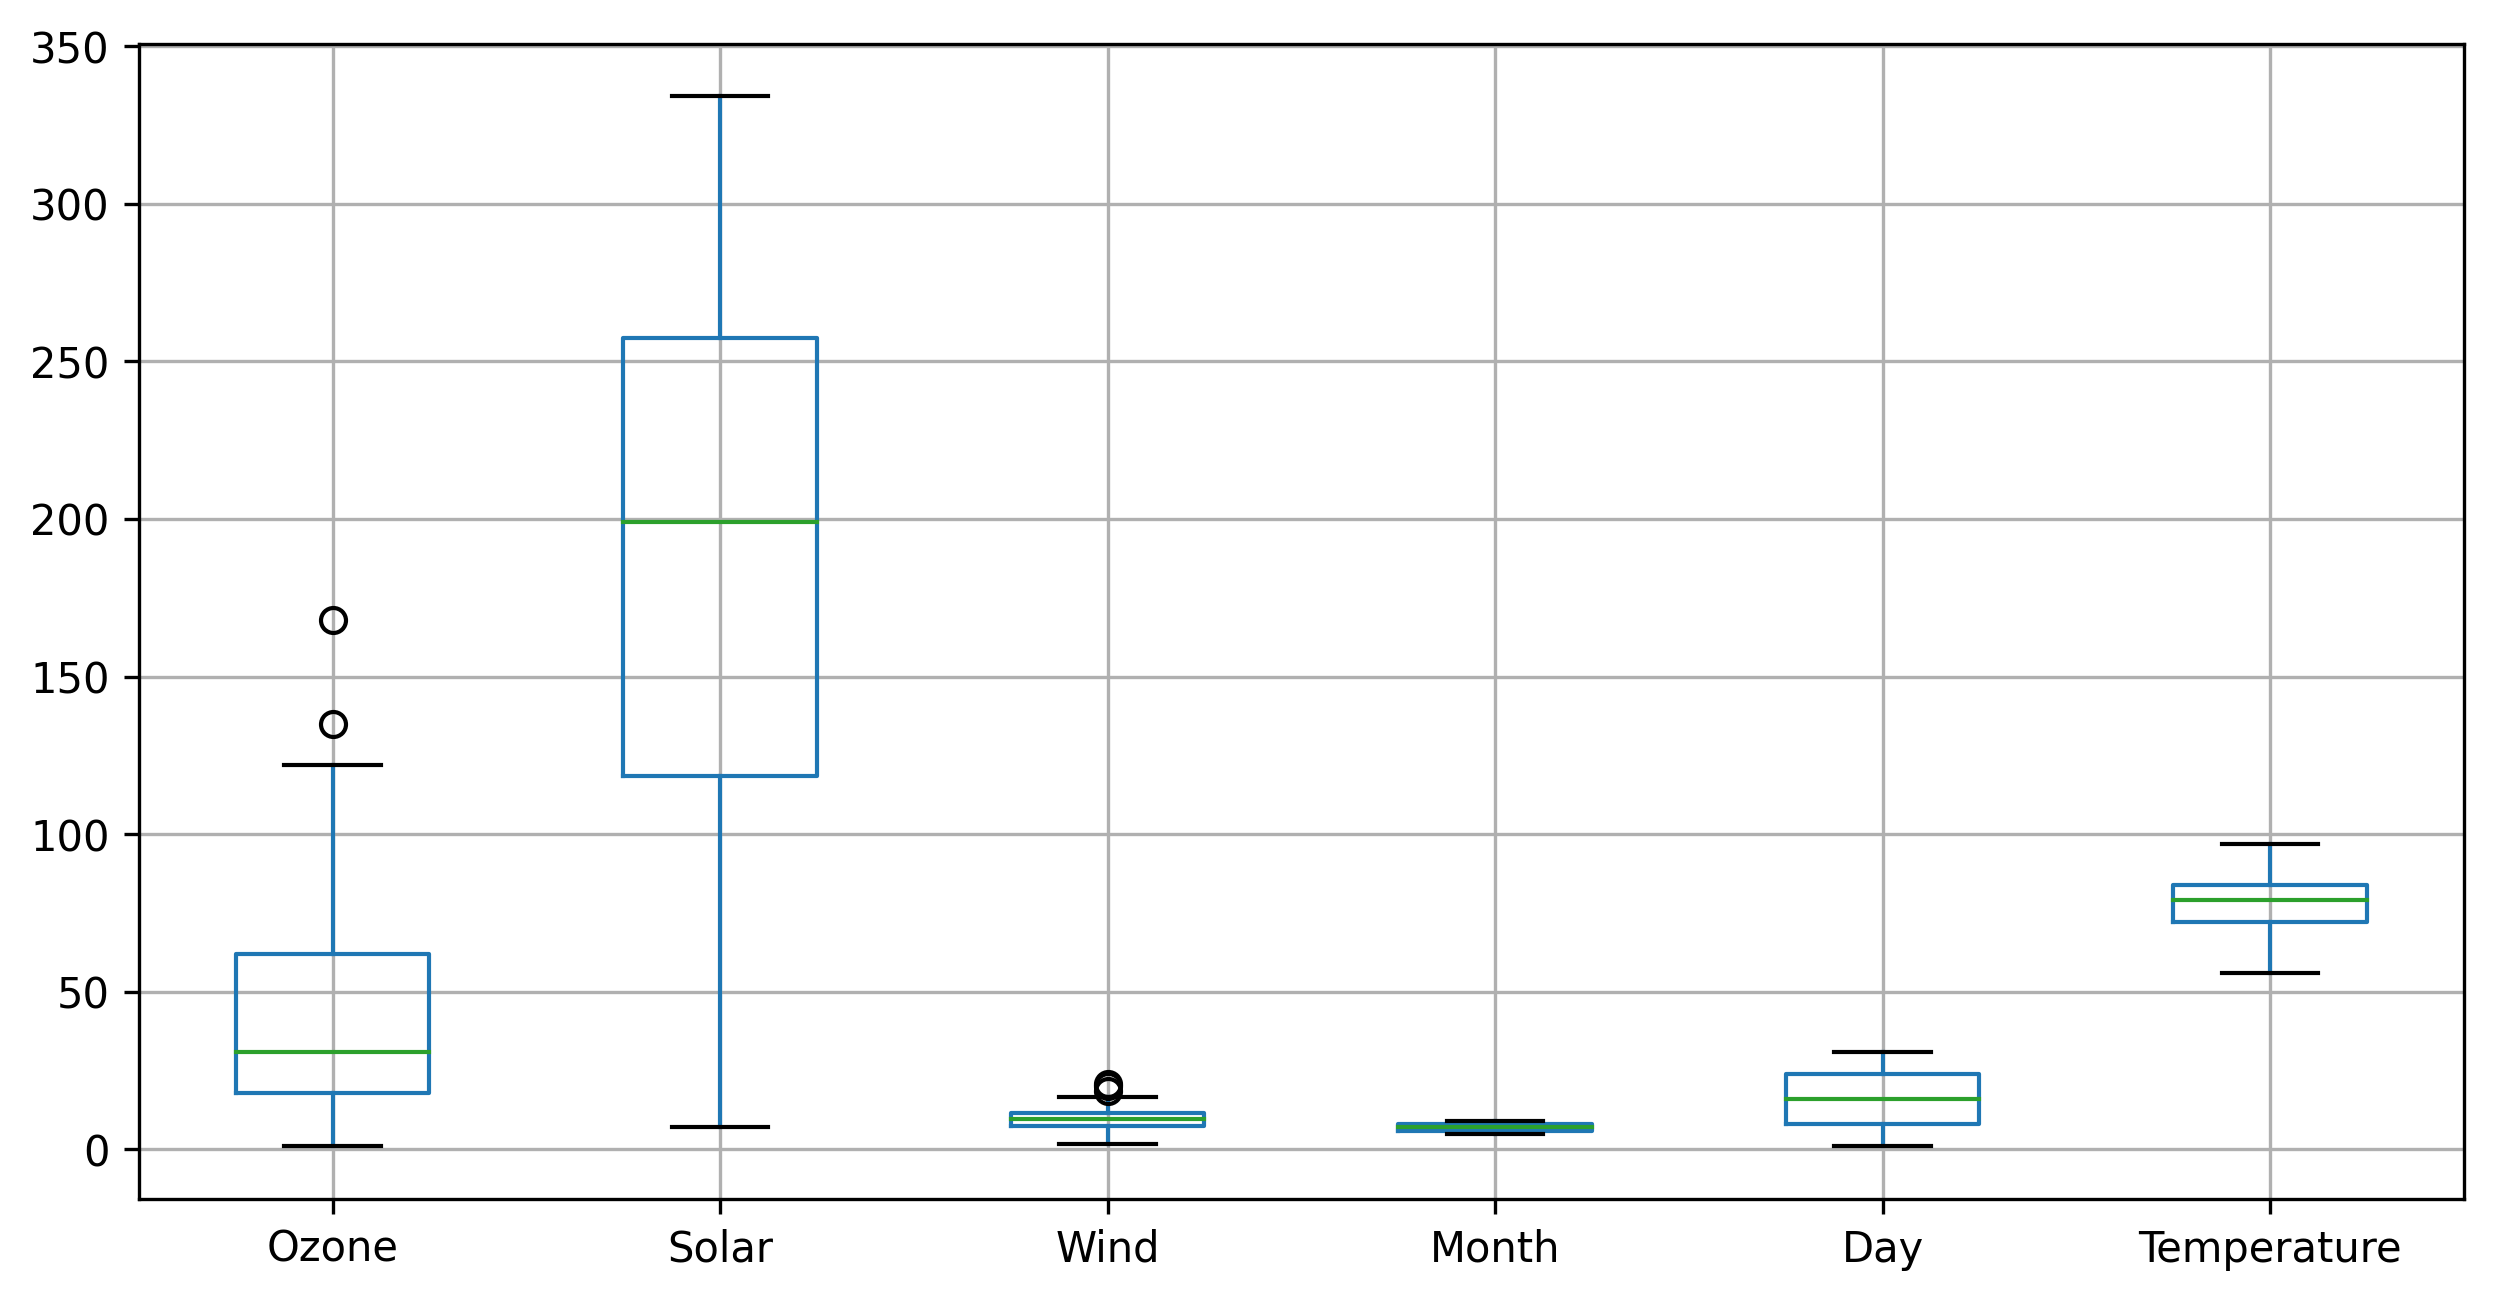

In [ ]:
df.boxplot()
# Ozone: outliers are present so replace missing values with median
# In Solar: No outliers so replace missing values with mean

<Axes: xlabel='Wind'>

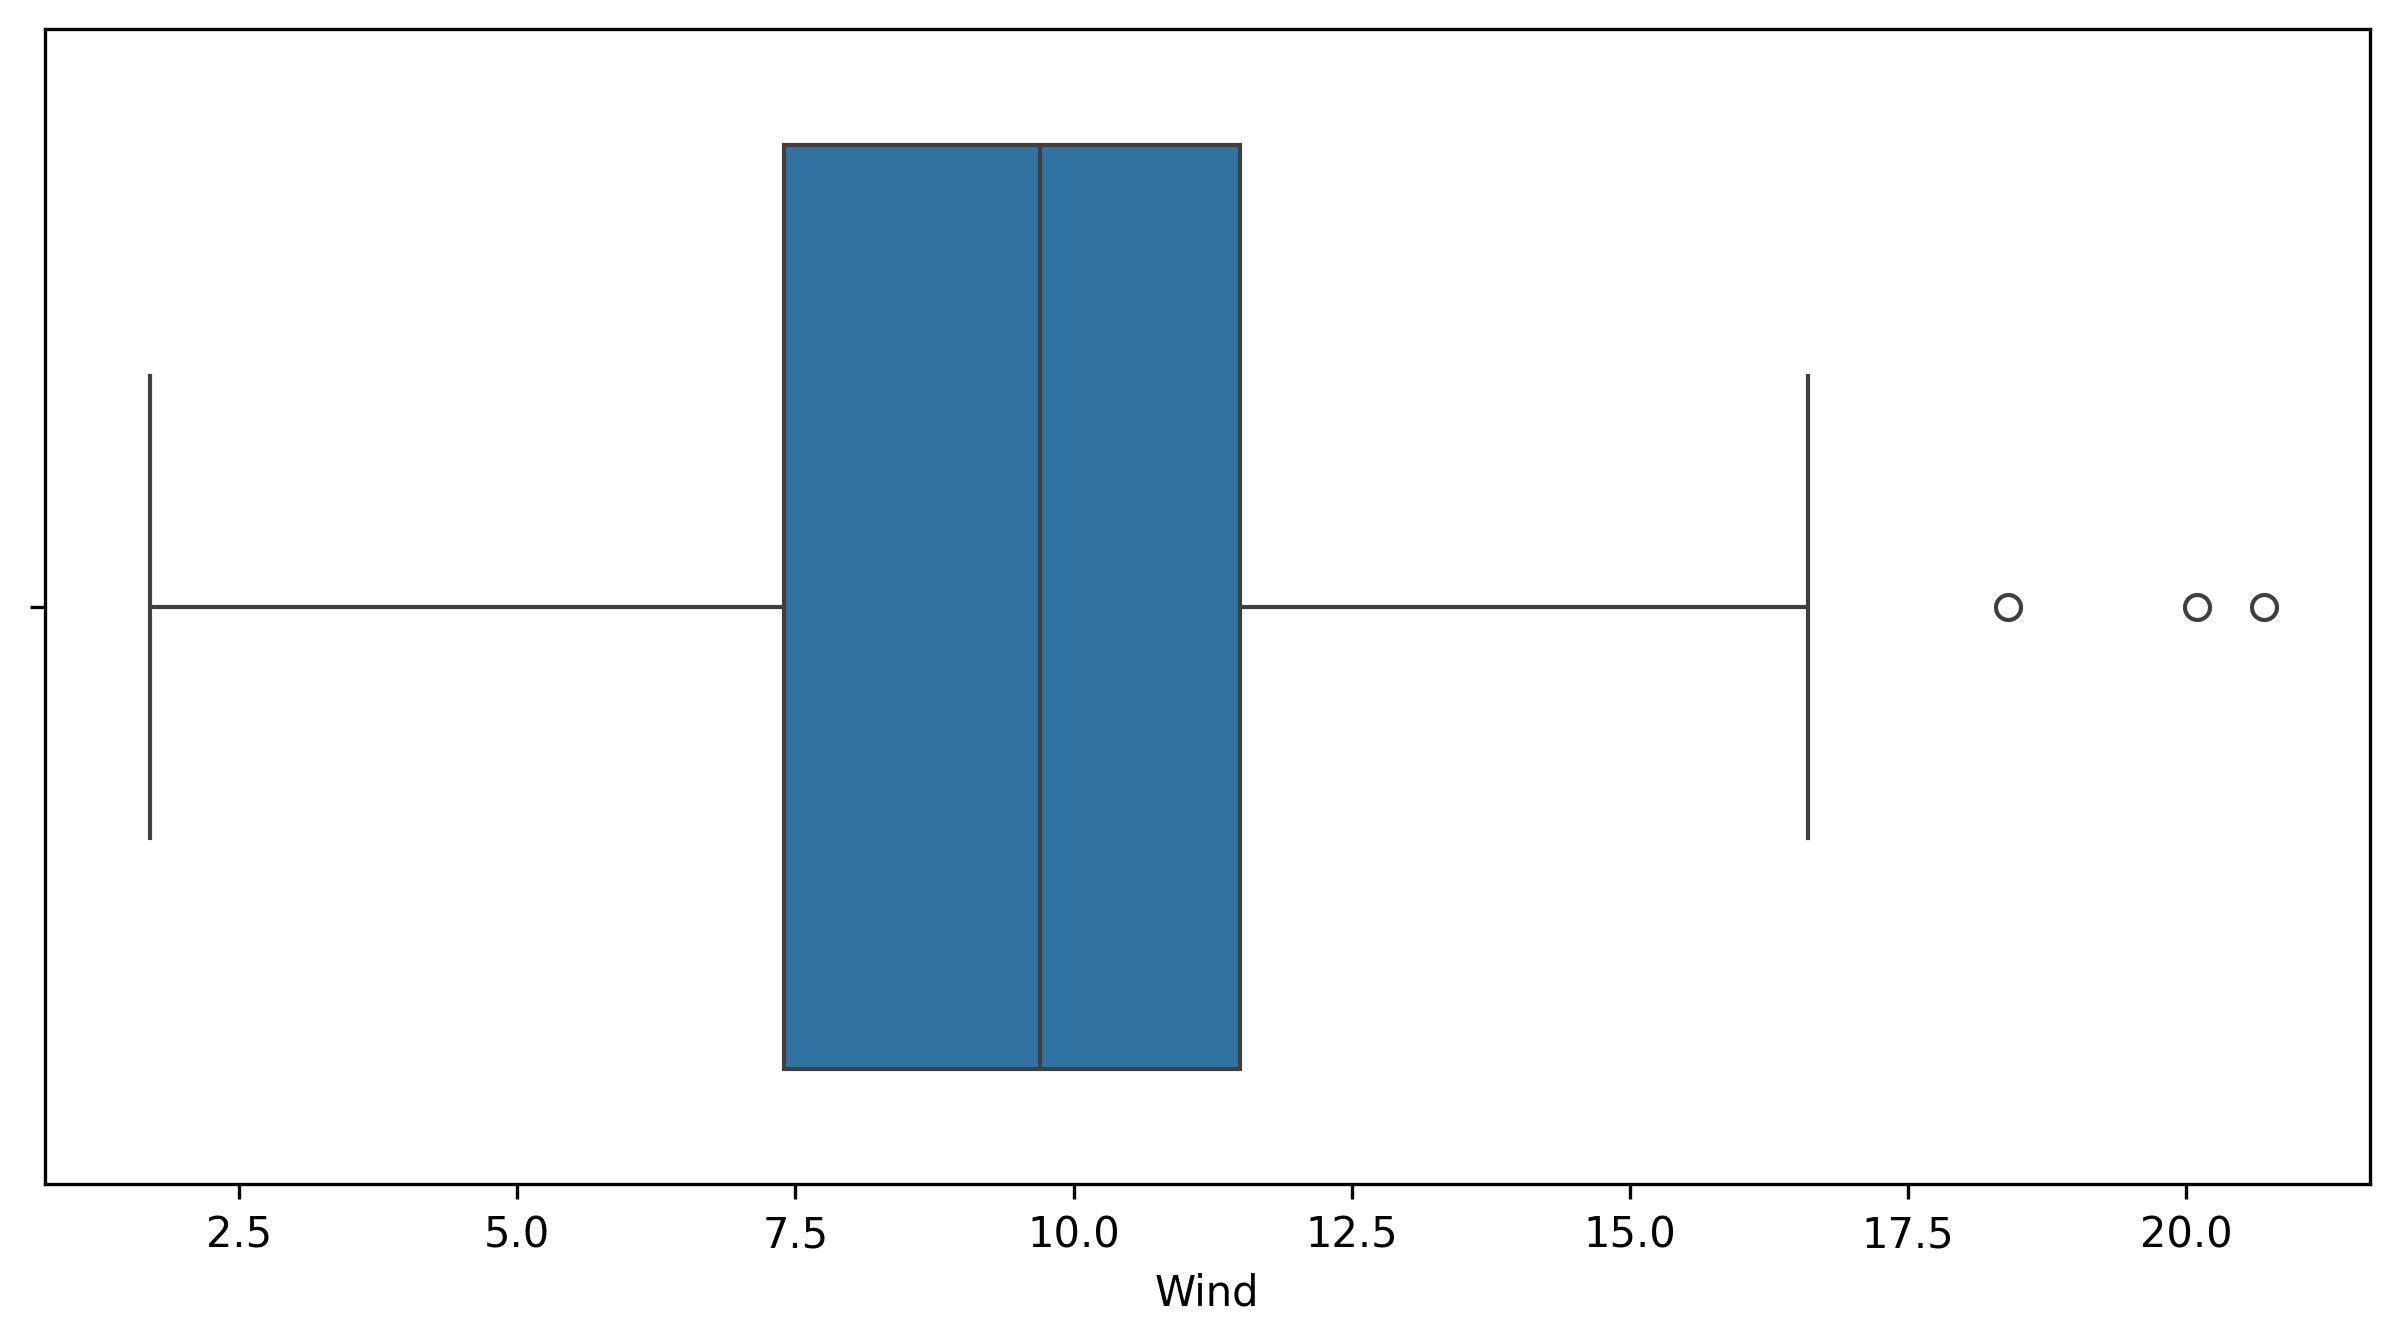

In [ ]:
sns.boxplot(x = df['Wind']) # for vertical boxplot: sns.boxplot(y = df['Wind'])

In [ ]:
ozone_median = df['Ozone'].median()
ozone_median

31.0

In [ ]:
df['Ozone'].fillna(ozone_median,inplace=True)

In [ ]:
df.isna().sum()

Ozone          0
Solar          7
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [ ]:
df['Solar'].mean()

185.36666666666667

In [ ]:
df['Solar'].fillna(df['Solar'].mean(),inplace=True)

In [ ]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [ ]:
df['Weather'].value_counts()

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

In [ ]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [ ]:
df['Weather'].mode()[0] # for multimodal values select index 0 mode

'S'

In [ ]:
df['Weather'].fillna(df['Weather'].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

In [ ]:
df['Weather'].value_counts()

Weather
S     61
C     49
PS    47
Name: count, dtype: int64

# **Outlier Detection**
*   Histogram
*   Boxplot
*   Descriptive Statistics



In [ ]:
df.describe()
# getting idea that Ozone and Wind columns have outliers as huge gap in between 75% and max value

,Ozone,Solar,Wind,Month,Day,Temperature
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,185.366667,9.929936,7.019108,15.929936,77.745223
std,28.781992,86.998999,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


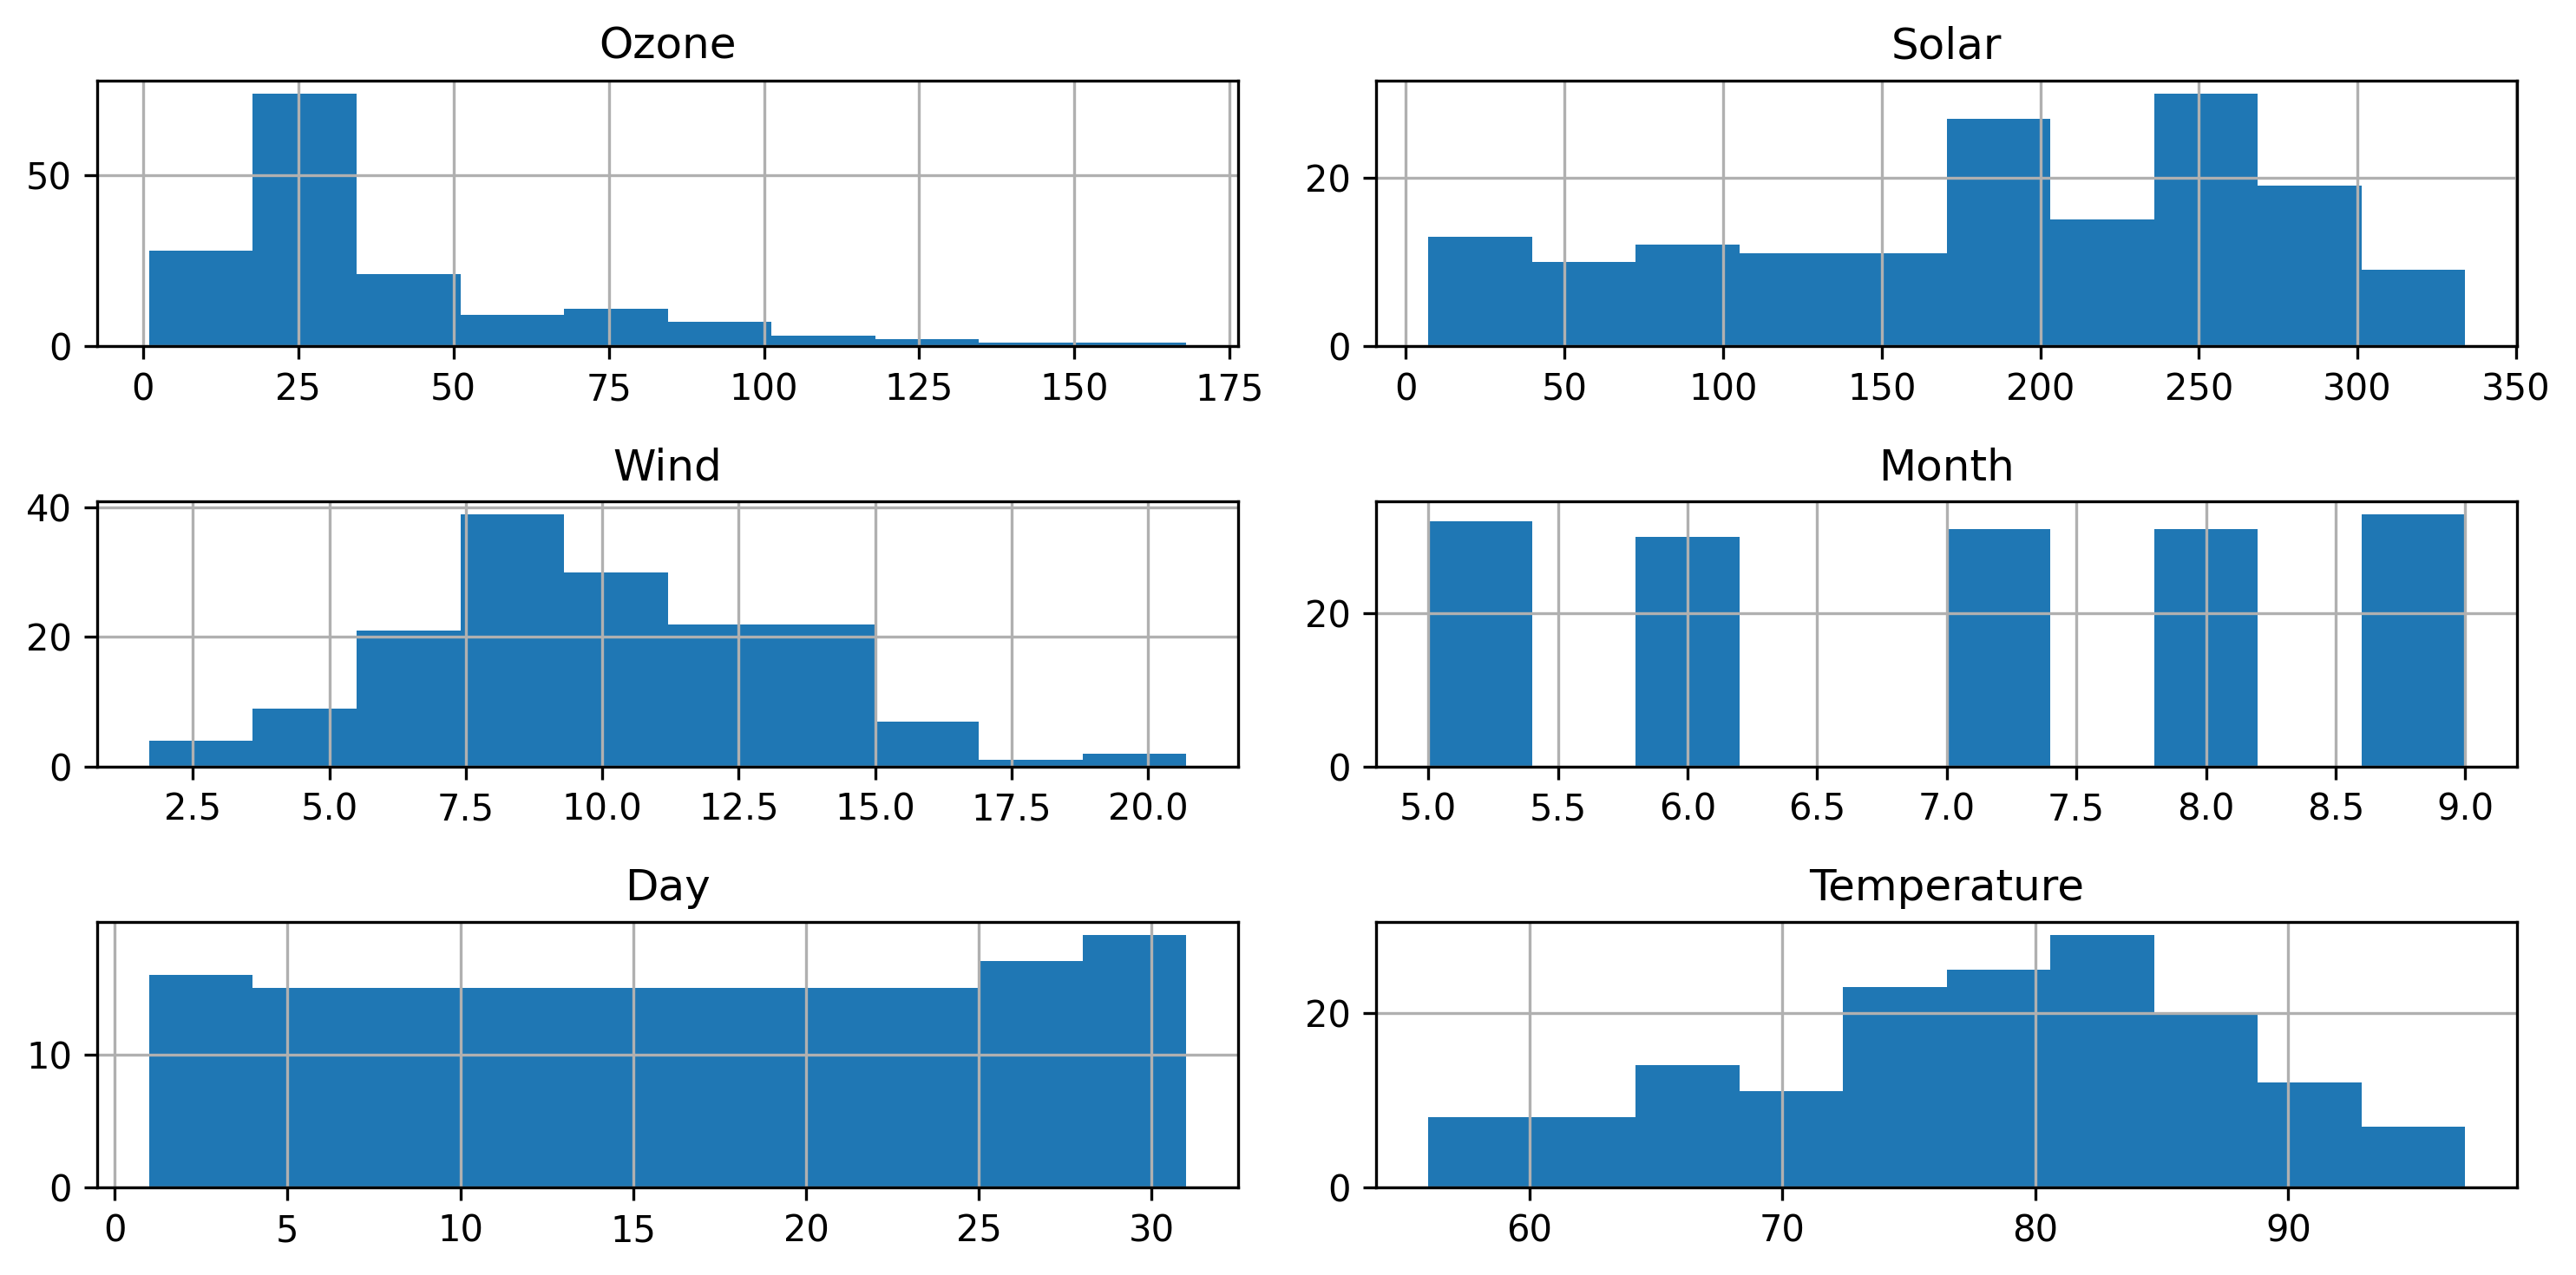

In [ ]:
df.hist()
plt.tight_layout()
# same outlier information is visible here. Confirm with boxplot

<Axes: >

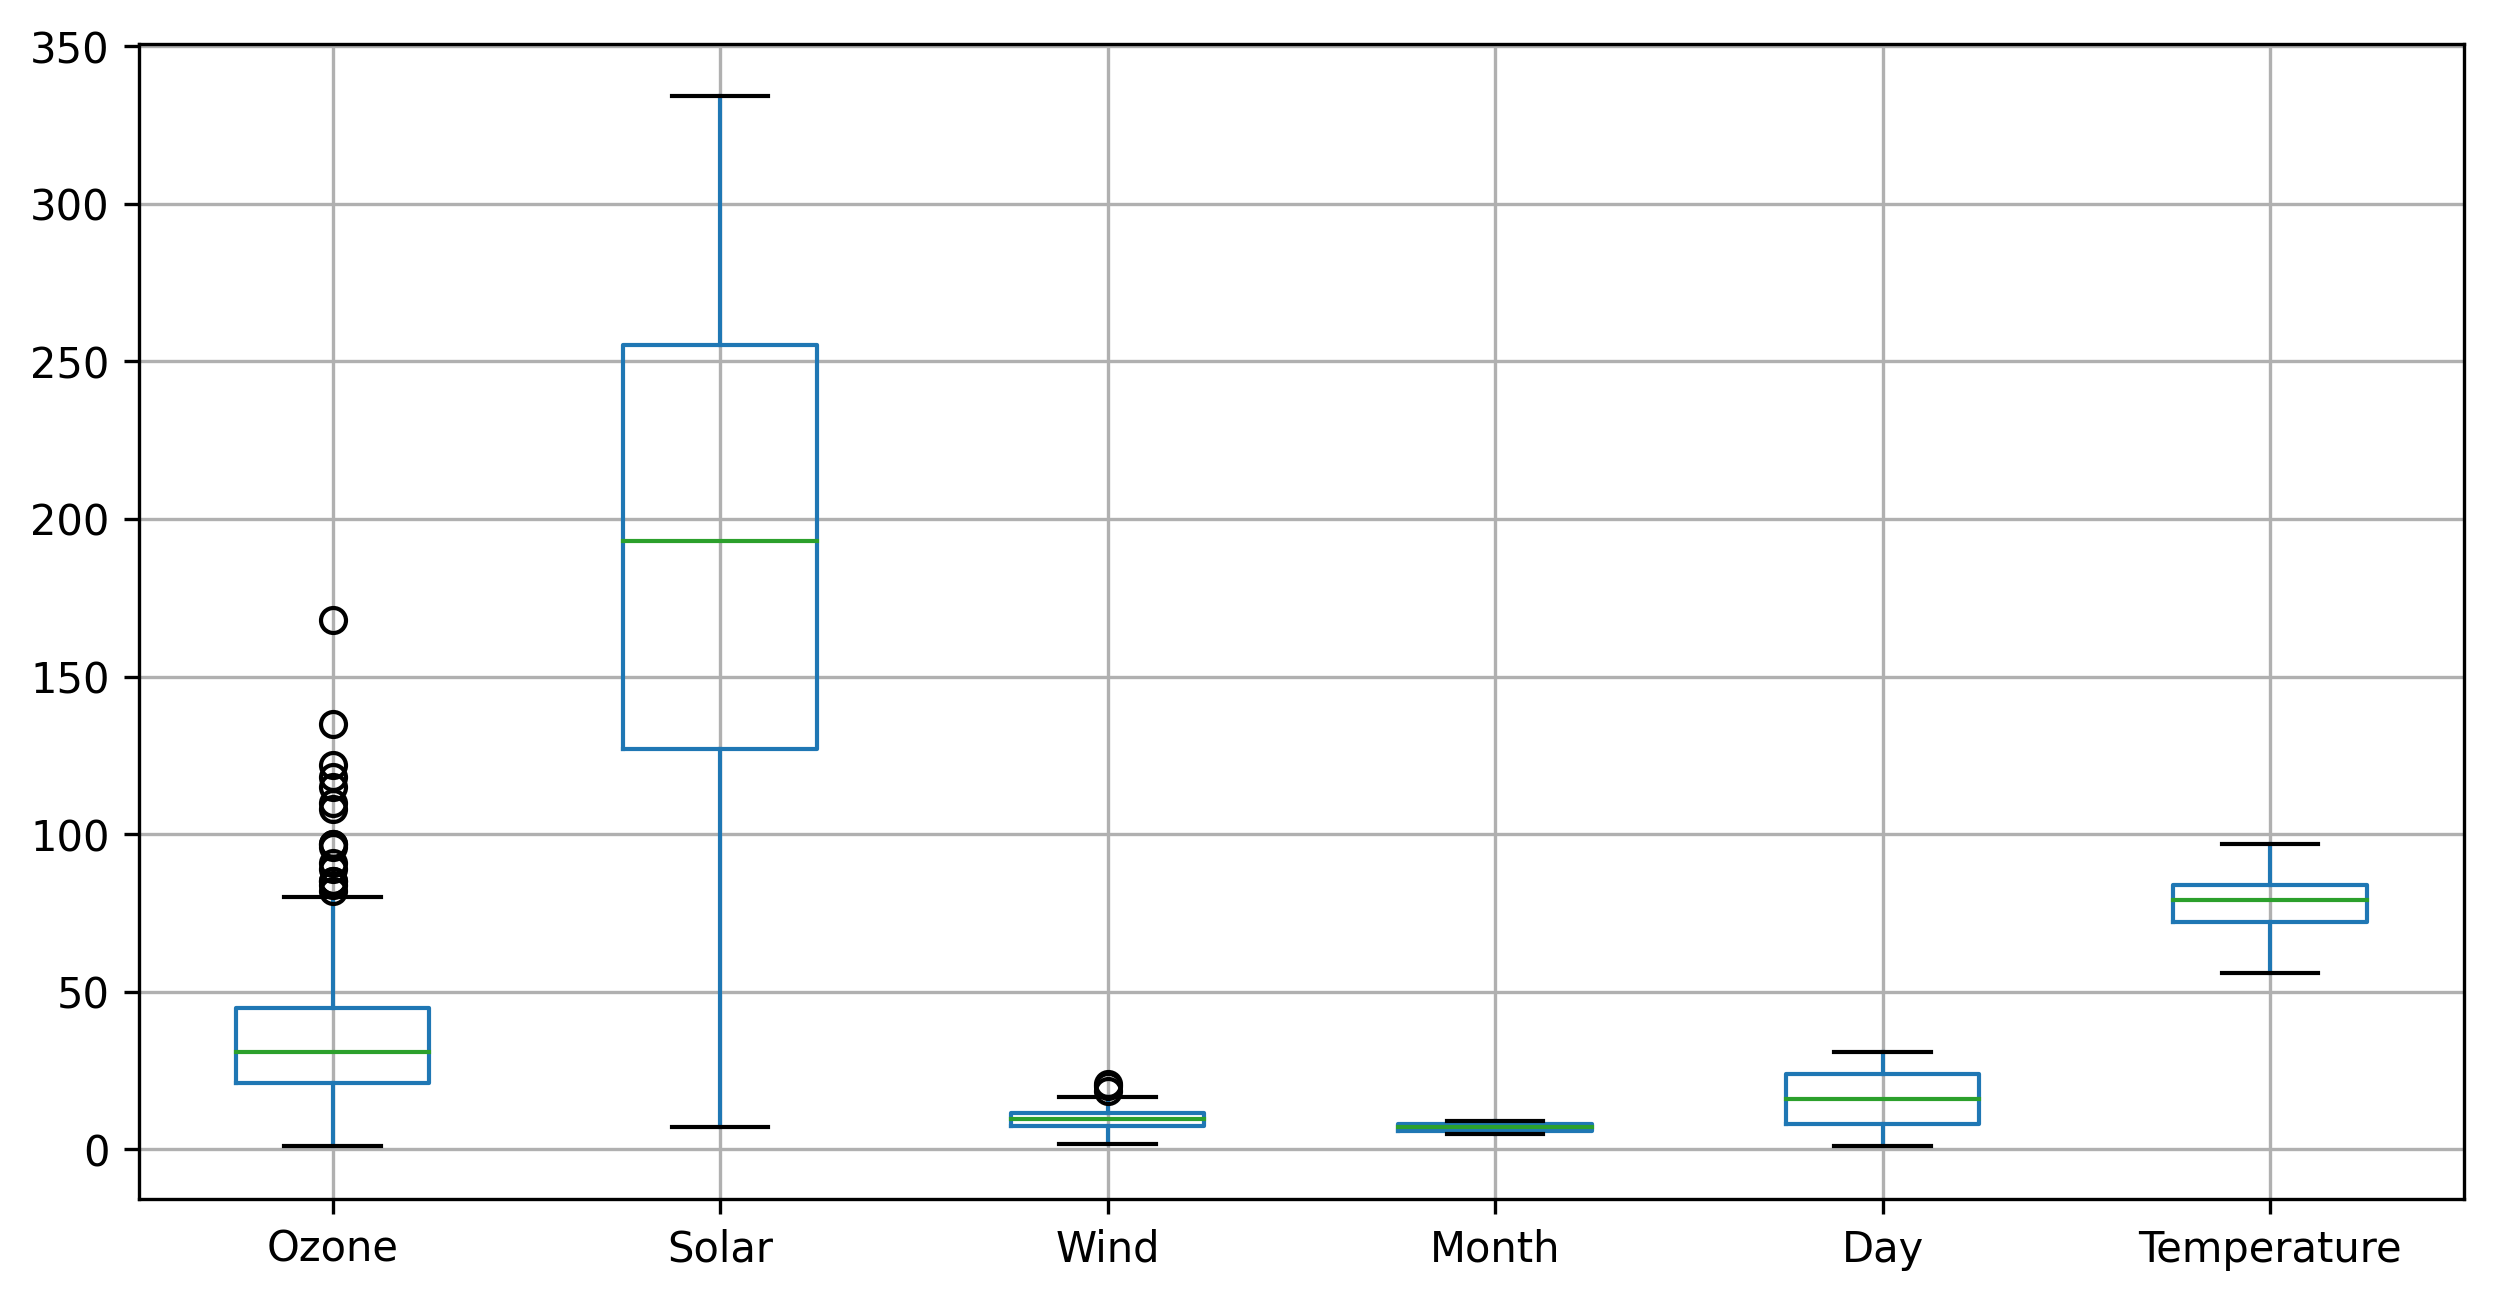

In [ ]:
df.boxplot()

<Axes: xlabel='Ozone'>

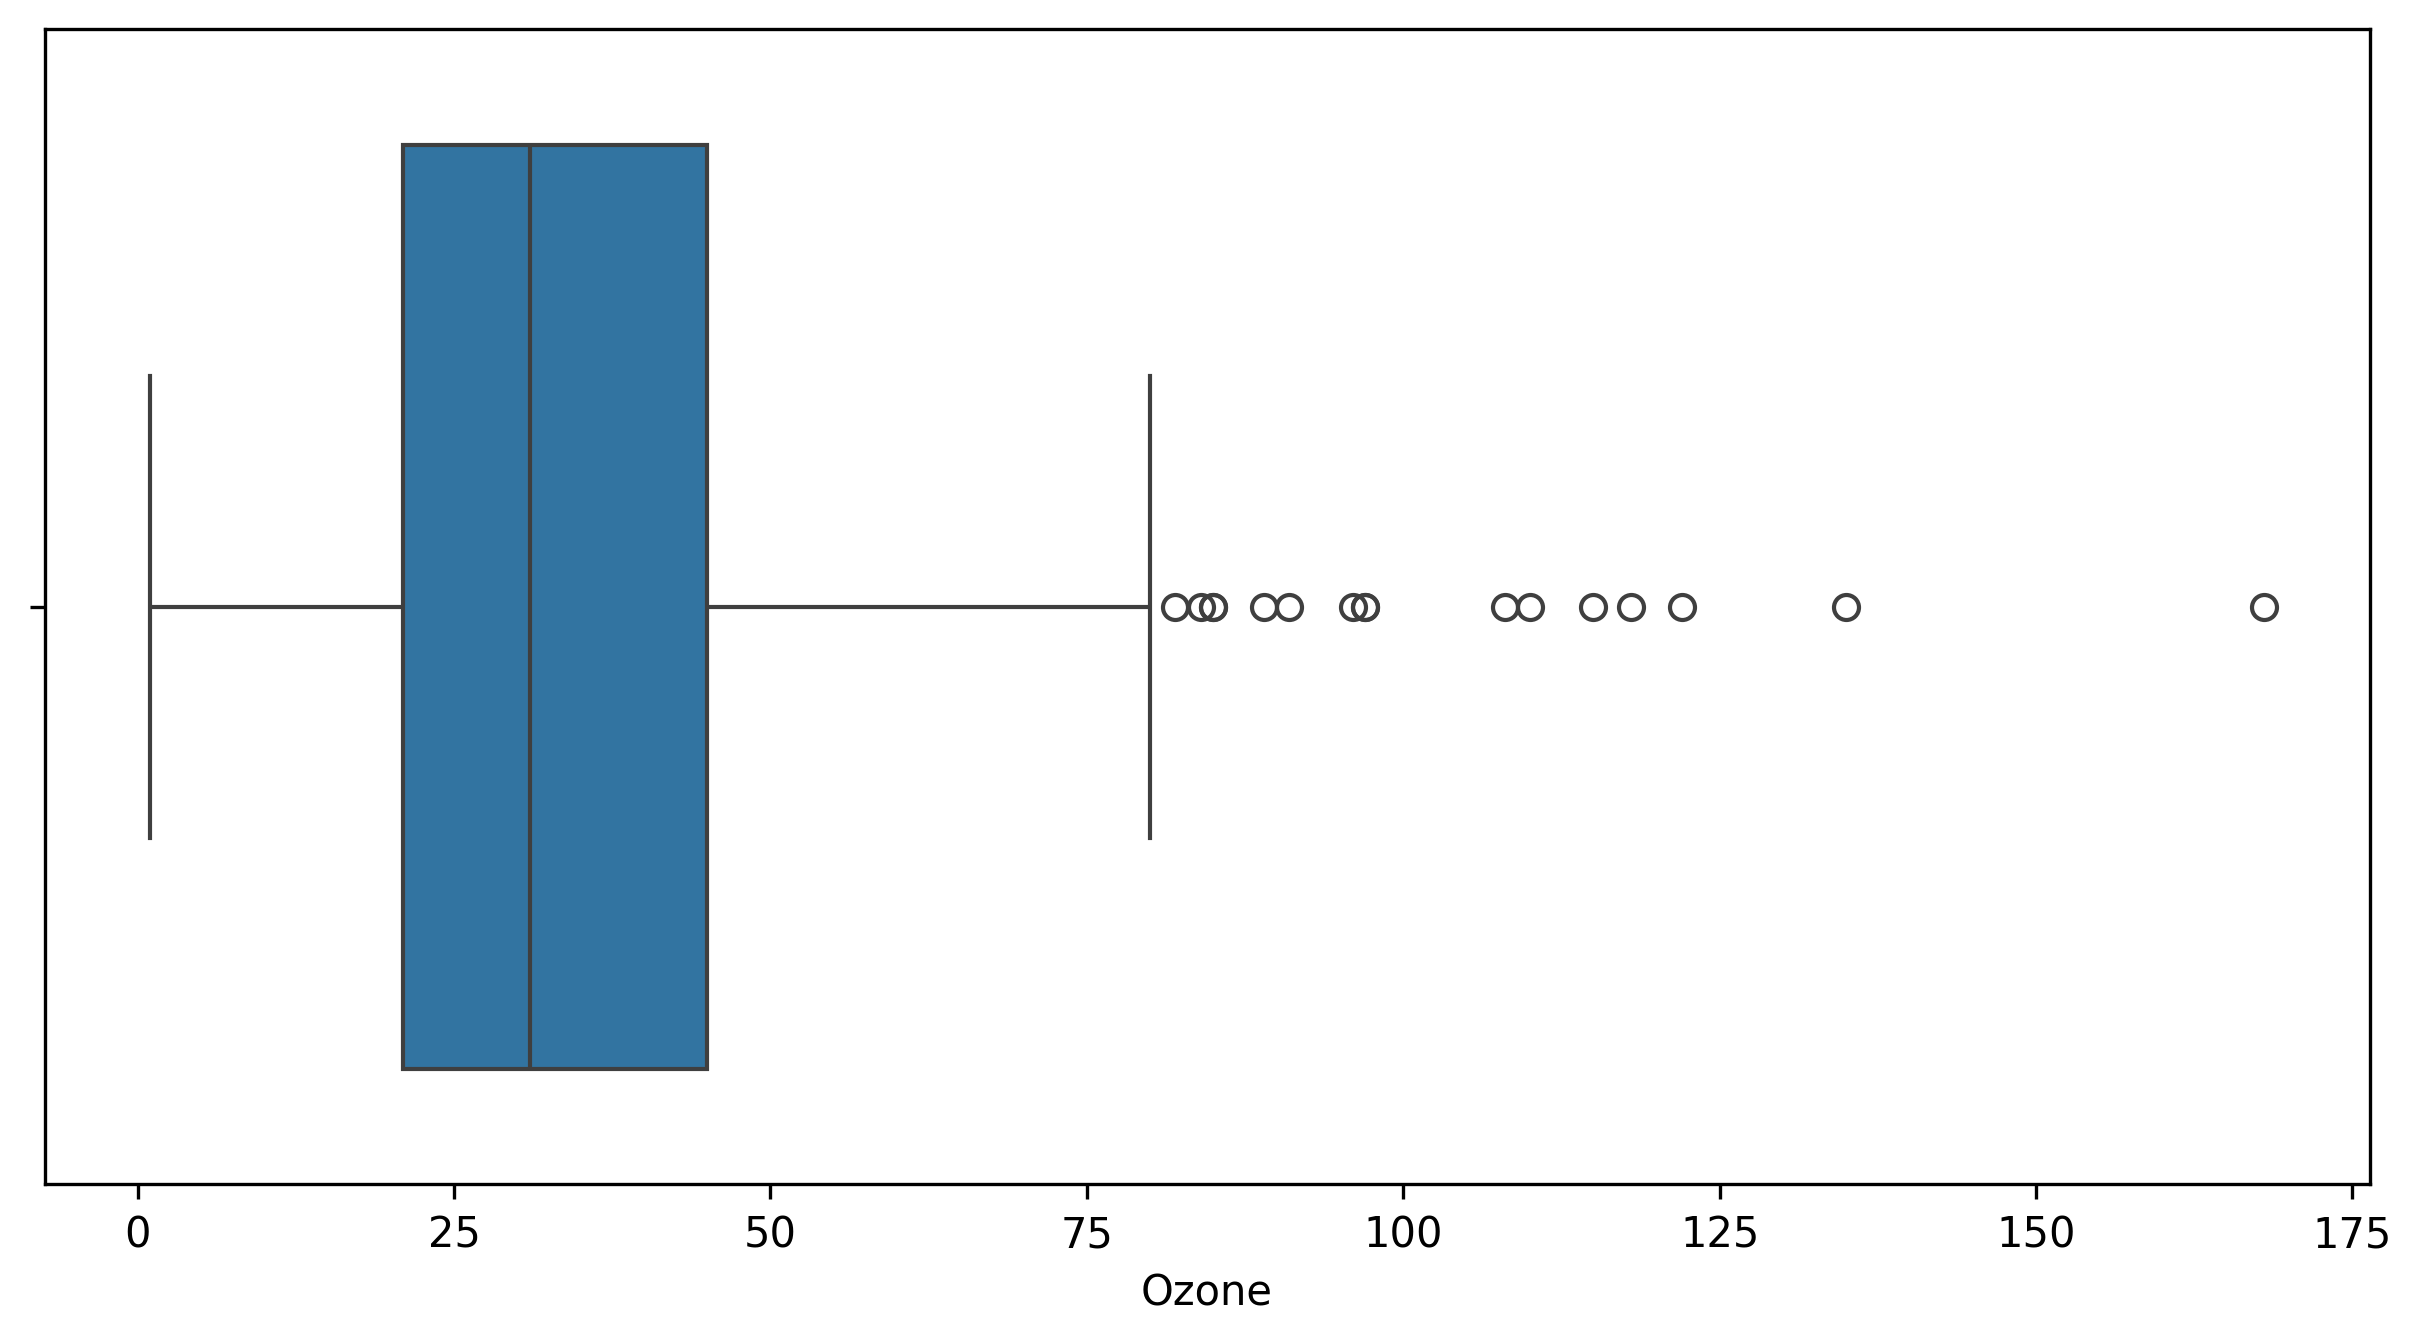

In [ ]:
sns.boxplot(x = df['Ozone'])

# **Outlier Treatment**

*   Capping: Replacing outlier values is called capping
*   In Capping all outlier values will be replaced by upper extreme



In [ ]:
def UserFunction():
  print("Hello")
  print("Function Introduction")

In [ ]:
UserFunction()

Hello
Function Introduction


In [ ]:
UserFunction(10)

TypeError: UserFunction() takes 0 positional arguments but 1 was given

In [ ]:
len()

In [ ]:
len(df)

157

In [ ]:
def add(num1,num2):
  print(num1 + num2)

In [ ]:
add()

In [ ]:
add(27,33)

In [ ]:
def arithmatic(num1,num2):
  print("Addition:",num1 + num2)
  print("Subtraction:",num1 - num2)
  print("Multiplication:",num1 * num2)
  print("Division:",num1 / num2)

In [ ]:
arithmatic(40,4)

In [ ]:
"Data" + "Science"

In [ ]:
"Data" + " " + "Science"

In [ ]:
def addText(text1,text2):
  print(text1 + " " + text2)

In [ ]:
addText("String","Concatenation")

In [ ]:
df['Ozone'].quantile(0.25) # lower quartile: q1

In [ ]:
df['Ozone'].quantile(0.75) # upper quartile: q3

In [ ]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [ ]:
outlier_detection(df,'Ozone')

(-48.0, 128.0, 18.0, 62.0)

In [ ]:
outlier_detection(df,'Wind') # try for 'Solar' or other columns

(1.2500000000000009, 17.65, 7.4, 11.5)

In [ ]:
import plotly.express as pe

In [ ]:
pe.scatter(x = df['Ozone'], y = df['Temperature'])

In [ ]:
# extract all values of Ozone column which are greater than upper extreme i.e 81
df[df['Ozone']>81.0]

In [ ]:
df[df['Ozone']>81.0].shape[0]

In [ ]:
# OR
len(df[df['Ozone']>81.0])

In [ ]:
# Now all these 16 outlier values of Ozone column should be replaced by upper extreme
df.loc[df['Ozone']>81.0,'Ozone']

29     115.0
61     135.0
68      97.0
69      97.0
70      85.0
85     108.0
88      82.0
98     122.0
99      89.0
100    110.0
116    168.0
120    118.0
121     84.0
122     85.0
123     96.0
126     91.0
Name: Ozone, dtype: float64

In [ ]:
# Capping Outliers of Ozone column
df.loc[df['Ozone']>81.0,'Ozone'] = 81.0

In [ ]:
df[df['Ozone'] > 81.0]
# No values are displayed.. as all outliers are replaced by 81.0

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather


In [ ]:
df[df['Ozone'] == 81.0]
# confirm index values for which outliere are replaced - 21,61,68....
# check index in output of command lines 109 or 113

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
29,81.0,223.0,5.7,5,30,2010,79,C
61,81.0,269.0,4.1,7,1,2010,84,S
68,81.0,267.0,6.3,7,8,2010,92,PS
69,81.0,272.0,5.7,7,9,2010,92,C
70,81.0,175.0,7.4,7,10,2010,89,PS
85,81.0,223.0,8.0,7,25,2010,85,PS
88,81.0,213.0,7.4,7,28,2010,88,S
98,81.0,255.0,4.0,8,7,2010,89,C
99,81.0,229.0,10.3,8,8,2010,90,PS
100,81.0,207.0,8.0,8,9,2010,90,C


In [ ]:
# Do it for 'Wind' column also
outlier_detection(df,'Wind')

In [ ]:
sns.boxplot(x = df['Wind'])

In [ ]:
# Upper extreme value for Wind column is 17.65 so replace all values of Wind column which are greater than 17.65
df[df['Wind'] > 17.65]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
8,8.0,19.0,20.1,5,9,2010,61,PS
17,6.0,78.0,18.4,5,18,2010,57,C
47,37.0,284.0,20.7,6,17,2010,72,C


In [ ]:
# Capping Outliers of Wind column
df.loc[df['Wind']>17.65,'Wind'] = 17.65

<Axes: >

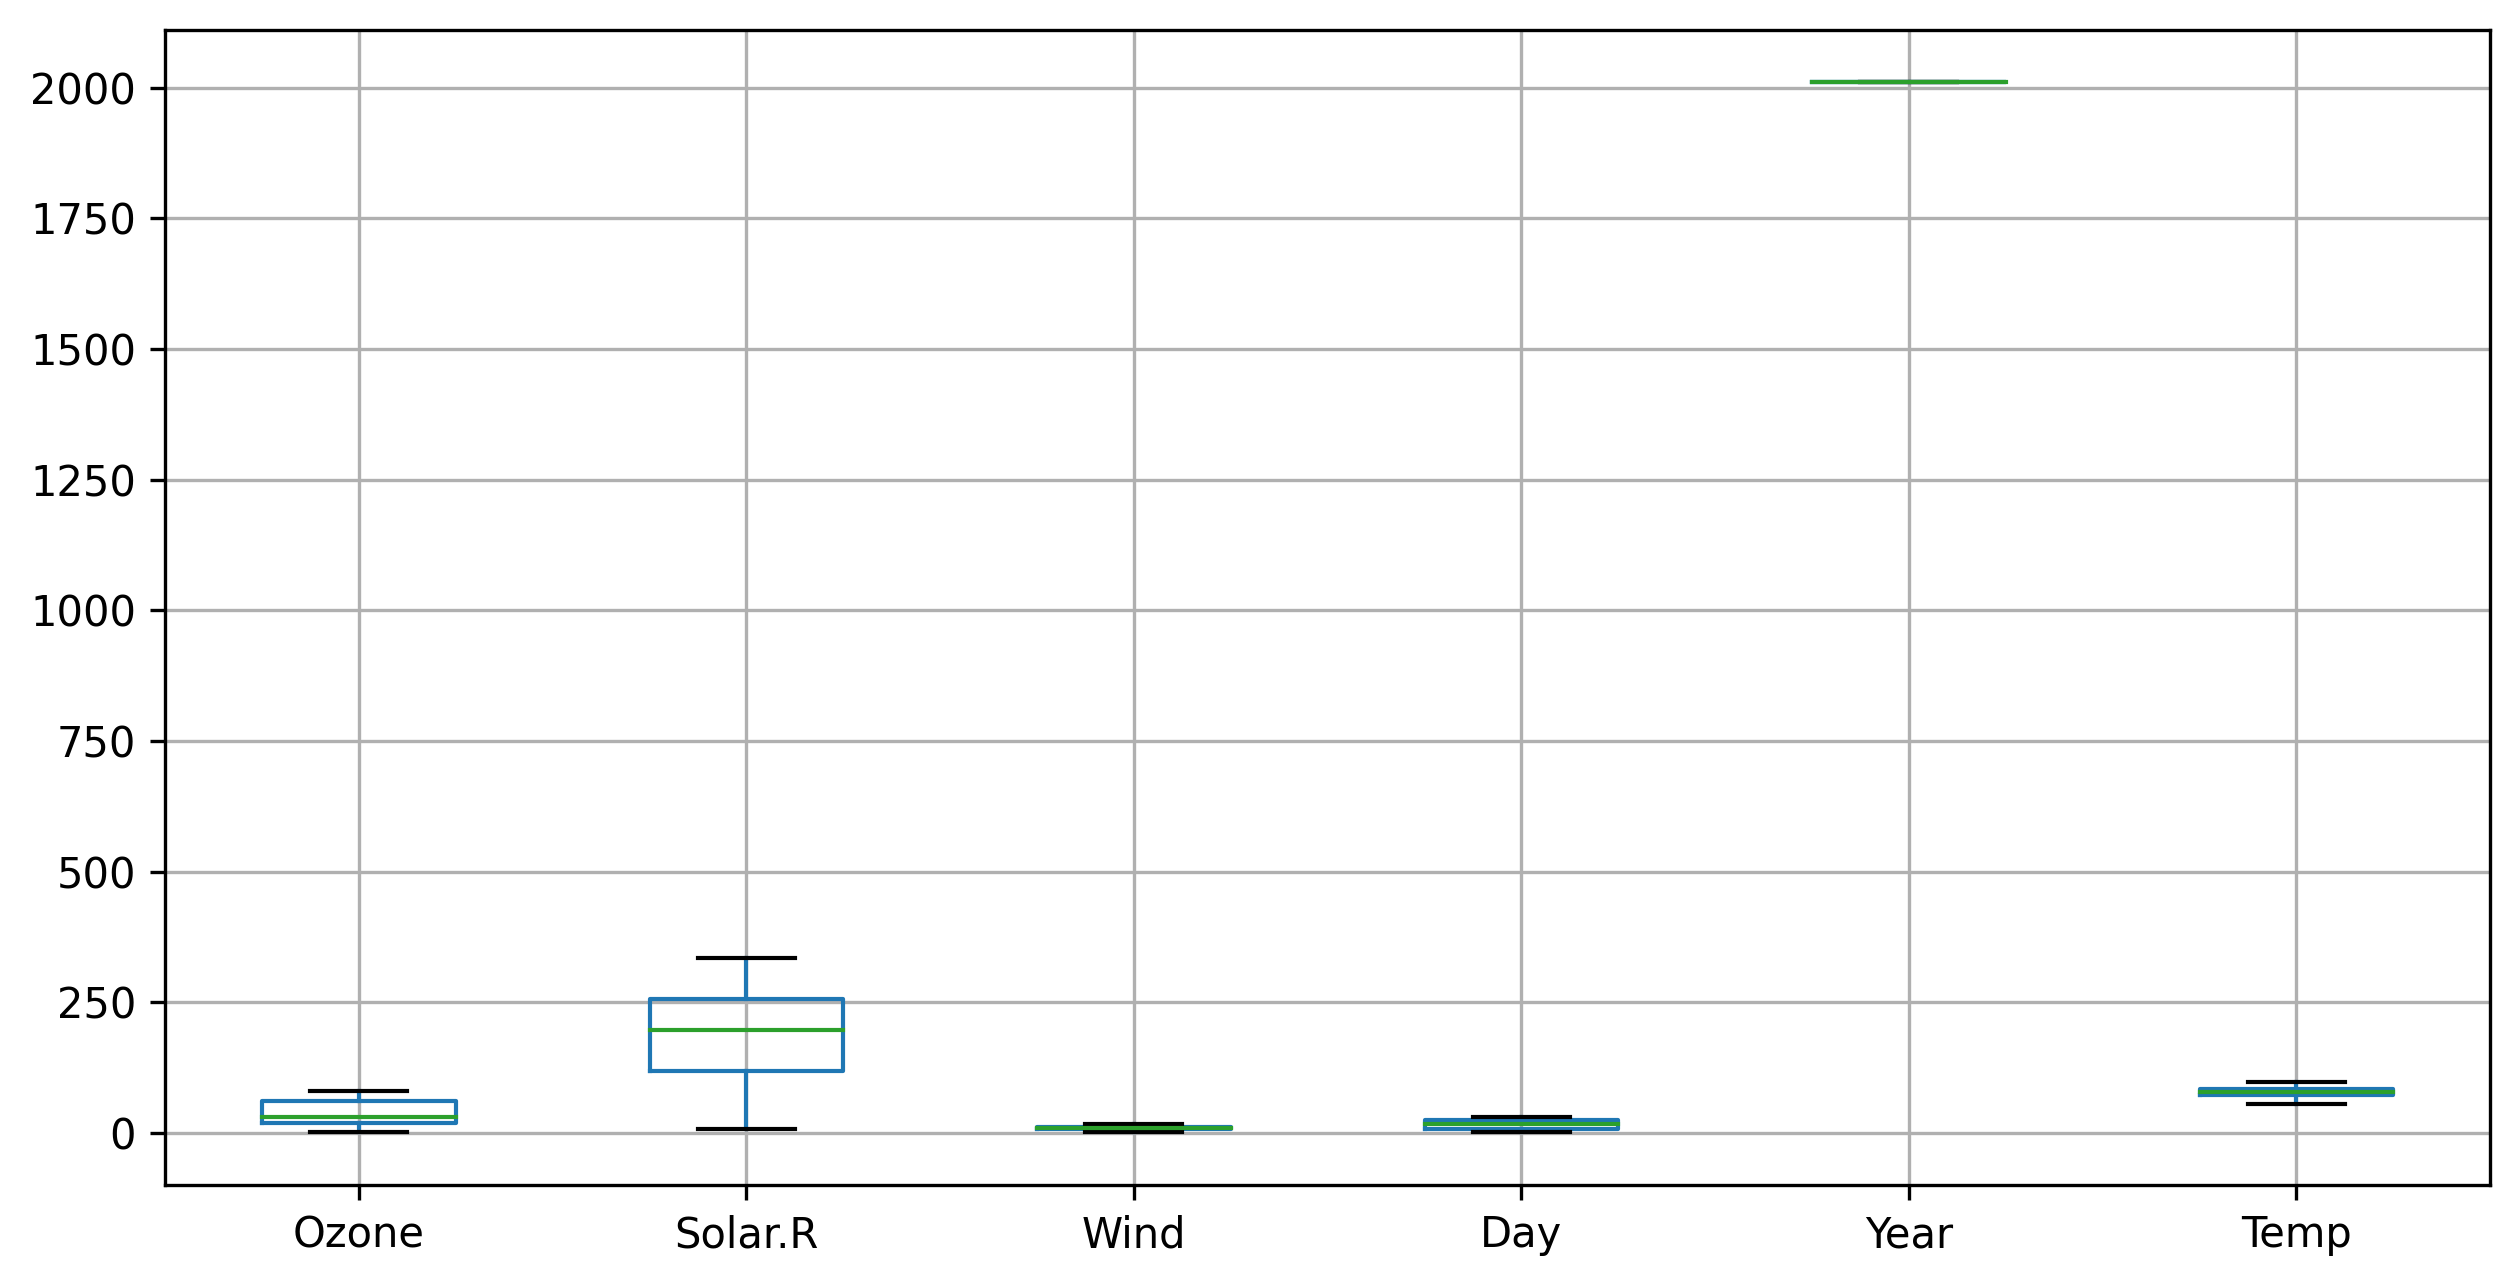

In [ ]:
df.boxplot()
# Now there are no outliers in any column

In [ ]:
df.shape

# **Scatter Plot and Correlation**

In [ ]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.000000,7.4,5,1,67,S
1,36.0,118.000000,8.0,5,2,72,C
2,12.0,149.000000,12.6,5,3,74,PS
3,18.0,313.000000,11.5,5,4,62,S
4,31.0,185.366667,14.3,5,5,56,S


In [ ]:
sns.pairplot(df) # relationship between all nemerical columns
# check graph of month(x axis) vs Temperature(y axis)
# We got 5 vertical lines in it because datatype of Month is Discrete numerical value. It has only 5 unique discrete numerical values.
# It shows no relationship between month and temperature

In [ ]:
df['Weather'].value_counts()

In [ ]:
# Correlation Coefficient
df.corr(numeric_only=True)
# Ozone vs Ozone corr is 1.0 so ignore diagonal values
# Ozone vs Temperature corr is 0.66 i.e. positive moderate correlation
# For large no. of columns go for heatmap visualization

In [ ]:
sns.heatmap(df.corr(numeric_only=True))
# See sidebar which shows -1 to +1 valuues from bottom to top
# On the side vertical bar Light color indicates positive strong relationship.
# Dark black color indicates strong negative relationship
# For clear understanging pass parameters to heatmap()

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
# colors are representing correlation value also

In [ ]:
# we can change color combination also
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='rainbow') # cmap='crest'

# **Transformations**


*   Convert Text data to numeric before model building



In [ ]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.000000,7.4,5,1,67,S
1,36.0,118.000000,8.0,5,2,72,C
2,12.0,149.000000,12.6,5,3,74,PS
3,18.0,313.000000,11.5,5,4,62,S
4,31.0,185.366667,14.3,5,5,56,S


In [ ]:
# Encoding using Pandas dummy function
df = pd.get_dummies(data = df, columns = ['Weather'])

In [ ]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5,1,67,False,False,True
1,36.0,118.000000,8.0,5,2,72,True,False,False
2,12.0,149.000000,12.6,5,3,74,False,True,False
3,18.0,313.000000,11.5,5,4,62,False,False,True
4,31.0,185.366667,14.3,5,5,56,False,False,True
...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9,30,68,False,False,True
153,41.0,190.000000,7.4,5,1,67,True,False,False
154,30.0,193.000000,6.9,9,26,70,False,True,False
155,31.0,145.000000,13.2,9,27,77,False,False,True


# **Scaling the data**

*   Bring down all columns to same scale

*   Normalization: Scales value within the range 0 to 1

*   Standardization: Uses Z score for scaling. Scale values in such a way that the mean=0 and std=1.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Standardization
sc = StandardScaler() # ZScore=(x-x bar)/std

In [ ]:
# sc.fit(): 1st Mean and Std of Ozone column is calculated. Then in numerator subtraction is done i.e. x-mean.
#           Then answer is divided by Std. Thus z-score is calculated. All the calculations are done by fit() function.
# sc.transform(): Original value in table is replaced by transform() function. i.e. 41.0 in Ozone column is replaced by it's z-score as 0.1901
# sc.fit_transform(): does both of the above tasks.

In [ ]:
sc.fit_transform(df)

array([[ 0.06282803,  0.05342774, -0.72407878, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.11144761, -0.7768163 , -0.55235617, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-0.94797067, -0.41935011,  0.76418385, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.32057837,  0.08802124, -0.86718096, ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.28572324, -0.46547478,  0.93590646, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.7388399 , -0.62691113, -0.55235617, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [ ]:
pd.DataFrame(sc.fit_transform(df)) # got table but column names are not visible. Index is there.

,0,1,2,3,4,5,6,7,8
0,0.062828,0.053428,-0.724079,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.111448,-0.776816,-0.552356,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-0.947971,-0.419350,0.764184,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.738840,1.471761,0.449359,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.285723,0.000000,1.250731,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.669130,0.433956,0.449359,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.062828,0.053428,-0.724079,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.320578,0.088021,-0.867181,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.285723,-0.465475,0.935906,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [ ]:
df.columns # display all column names in sequence

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [ ]:
# convert scaled array into dataframe. For this standardized data mean=0 and std=1
scaled_data = pd.DataFrame(sc.fit_transform(df),columns=df.columns)
scaled_data

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.062828,0.053428,-0.724079,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.111448,-0.776816,-0.552356,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-0.947971,-0.419350,0.764184,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.738840,1.471761,0.449359,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.285723,0.000000,1.250731,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.669130,0.433956,0.449359,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.062828,0.053428,-0.724079,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.320578,0.088021,-0.867181,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.285723,-0.465475,0.935906,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [ ]:
# check if mean=0 and std=1
scaled_data.describe()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
count,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,-3.394312e-17,-9.051500e-17,1.470869e-16,1.810300e-16,-2.262875e-17,2.036587e-16,4.242891e-17,-8.485781e-18,-7.849347e-17
std,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00
min,-1.595181e+00,-2.056776e+00,-2.416106e+00,-1.412198e+00,-1.668937e+00,-2.319408e+00,-6.735753e-01,-6.536610e-01,-7.971303e-01
25%,-7.024938e-01,-6.730358e-01,-7.345931e-01,-7.127815e-01,-8.864446e-01,-6.128020e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
50%,-2.561501e-01,8.802124e-02,-5.608800e-02,-1.336465e-02,7.832041e-03,1.338381e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
75%,3.687310e-01,8.029536e-01,4.749160e-01,6.860522e-01,9.021087e-01,6.671525e-01,1.484615e+00,1.529845e+00,1.254500e+00
max,1.975568e+00,1.713916e+00,2.289180e+00,1.385469e+00,1.684601e+00,2.053770e+00,1.484615e+00,1.529845e+00,1.254500e+00


# **MinMaxScaler()**

In [ ]:
mn = MinMaxScaler()

In [ ]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [ ]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled # converted value is in range of 0 and 1

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.239521,0.559633,0.300000,0.0,0.000000,0.268293,0.0,0.0,1.0
1,0.209581,0.339450,0.331579,0.0,0.033333,0.390244,1.0,0.0,0.0
2,0.065868,0.434251,0.573684,0.0,0.066667,0.439024,0.0,1.0,0.0
3,0.101796,0.935780,0.515789,0.0,0.100000,0.146341,0.0,0.0,1.0
4,0.179641,0.545464,0.663158,0.0,0.133333,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
152,0.113772,0.660550,0.515789,1.0,0.966667,0.292683,0.0,0.0,1.0
153,0.239521,0.559633,0.300000,0.0,0.000000,0.268293,1.0,0.0,0.0
154,0.173653,0.568807,0.273684,1.0,0.833333,0.341463,0.0,1.0,0.0
155,0.179641,0.422018,0.605263,1.0,0.866667,0.512195,0.0,0.0,1.0


In [ ]:
minmax_scaled.describe() # check min and max values as 0 and 1 respectively

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.228727,0.545464,0.433155,0.504777,0.497665,0.530371,0.312102,0.299363,0.388535
std,0.172347,0.266052,0.184484,0.358584,0.299147,0.229398,0.464834,0.459445,0.488977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.119760,0.366972,0.300000,0.250000,0.233333,0.390244,0.000000,0.000000,0.000000
50%,0.179641,0.568807,0.421053,0.500000,0.500000,0.560976,0.000000,0.000000,0.000000
75%,0.263473,0.758410,0.515789,0.750000,0.766667,0.682927,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
